# Machine Learning and Data Analysis
----------------------------------------------
### *Session 4.1*


```
12th October, 2023
Anna Pallarès López
Computer Engineering Master's

```



In [1]:
# import libraries

import numpy as np
import numpy.matlib as nml
import matplotlib.pyplot as plt

In [2]:
np.random.seed(11)

In [3]:
# define a funtion

def oracle(x):
  #return x
  return x**2
  #return np.sinc(3*x)

In [4]:
n = 100
sigma = .01
d = 1

In [5]:
x = np.random.rand(n)
X = np.asarray(np.asmatrix(x).transpose())
y = oracle(x) + sigma*np.random.rand(n)

In [6]:
ns = 1000
xs = np.linspace(0,1,ns)
Xs = np.asarray(np.asmatrix(xs).transpose())

In [7]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

Xlv,Xt, ylv, yt = train_test_split(X,y,test_size = 0.1)

grid = {'alpha' : np.logspace(-4,3,30),
        'kernel': ['rbf'],
        'gamma' : np.logspace(-4,3,30)}

MS = GridSearchCV(estimator   = KernelRidge(),
                  param_grid = grid,
                  scoring     = 'neg_mean_absolute_error',
                  cv          = 10)
H = MS.fit(Xlv,ylv)
M = KernelRidge(alpha  = H.best_params_['alpha'],
                kernel = H.best_params_['kernel'],
                gamma  = H.best_params_['gamma'])
M.fit(Xlv,ylv)

yp = M.predict(Xt)

ys = M.predict(Xs)

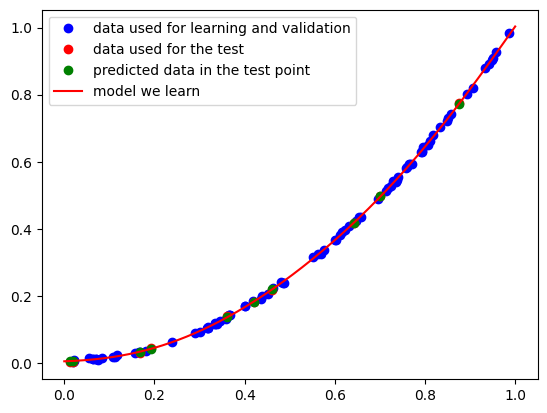

In [ ]:
fig, ax = plt.subplots()
ax.plot(Xlv,ylv,'bo', label='data used for learning and validation')
ax.plot(Xt,yt,'ro',label='data used for the test')
ax.plot(Xt,yp,'go',label='predicted data in the test point')
ax.plot(Xs,ys,'r',label= 'model we learn')

ax.legend()
